In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

##### Import Libraries

In [2]:
import pandas as pd
import numpy as np

##### Read Data

In [11]:
df = pd.read_csv('ec2_cpu_utilization.csv')
df.sample(5)

,timestamp,value
2399,2014-02-22 22:25:00,1.834
3862,2014-02-28 00:20:00,1.798
2708,2014-02-24 00:10:00,1.934
3358,2014-02-26 06:20:00,1.832
3165,2014-02-25 14:15:00,1.704


In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

##### Create & Fit the model

In [13]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42) 
    #the model will identify the top 1% of data points with the highest anomaly scores as outliers
    #Setting it too high can lead to misclassification of normal data points as outliers 
    #Setting it too low can result in many actual outliers going undetected
    #play around with 0.05 (top 5%), or 0.1 (top 1%)
model.fit(df[['value']])

IsolationForest(contamination=0.01, random_state=42)

In [14]:
# Predict anomalies (1 for inliers, -1 for outliers)
df['anomaly_score'] = model.decision_function(df[['value']])
df['anomaly'] = model.predict(df[['value']])
df.head() #-1 are the anomalies

,timestamp,value,anomaly_score,anomaly
0,2014-02-14 14:30:00,1.732,0.276165,1
1,2014-02-14 14:35:00,1.732,0.276165,1
2,2014-02-14 14:40:00,1.960,0.216226,1
3,2014-02-14 14:45:00,1.732,0.276165,1
4,2014-02-14 14:50:00,1.706,0.188529,1


#### Visualize results

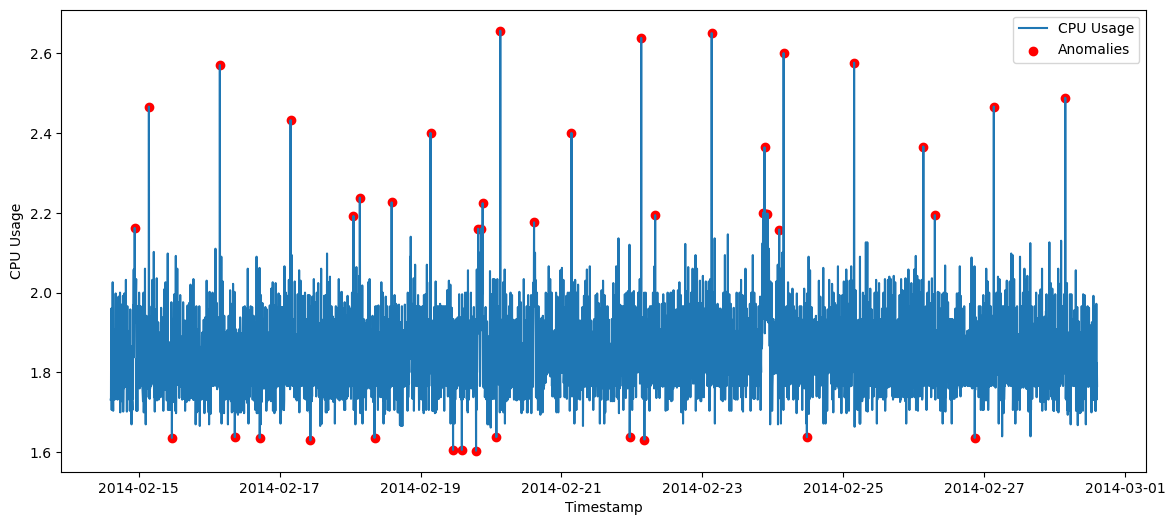

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['value'], label='CPU Usage')
plt.scatter(df[df['anomaly'] == -1]['timestamp'], df[df['anomaly'] == -1]['value'], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()